In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
sns.set(style = "whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)


In [18]:
df = pd.read_parquet("../data/architectural_styles_tfidf.parquet")
print("shape :", df.shape)
print("columns: ", list(df.columns))
df.head()


shape : (197, 1001)
columns:  ['Title', 'abbey', 'abstract', 'academy', 'according', 'across', 'act', 'activity', 'ad', 'adam', 'adapted', 'added', 'addition', 'adopted', 'aesthetic', 'africa', 'age', 'aisle', 'allowed', 'allowing', 'almost', 'along', 'already', 'also', 'altar', 'although', 'always', 'america', 'american', 'among', 'amsterdam', 'ancient', 'animal', 'another', 'apartment', 'appear', 'appearance', 'appeared', 'applied', 'approach', 'apse', 'arcade', 'arch', 'arched', 'architect', 'architectural', 'architecture', 'area', 'arm', 'around', 'arrangement', 'art', 'article', 'artist', 'artistic', 'asia', 'aspect', 'associated', 'attempt', 'attention', 'australia', 'author', 'available', 'away', 'aztec', 'back', 'baroque', 'barrel', 'base', 'based', 'basic', 'basilica', 'bay', 'beam', 'became', 'become', 'began', 'beginning', 'begun', 'belief', 'believed', 'best', 'beyond', 'biedermeier', 'block', 'blue', 'body', 'book', 'brick', 'bridge', 'britain', 'british', 'bronze', 'broth

,Title,abbey,abstract,academy,according,across,act,activity,ad,adam,...,would,writer,writing,wrote,xiv,xv,xvi,year,york,young
0,Architectural style,0.0,0.0,0.0,0.023527,0.022417,0.0,0.000000,0.000000,0.000000,...,0.0,0.031478,0.029877,0.0,0.0,0.0,0.0000,0.035492,0.000000,0.000000
1,List of architectural styles,0.0,0.0,0.0,0.000000,0.000000,0.0,0.052514,0.105027,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.061606,0.000000,0.000000
2,Timeline of architectural styles,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000
3,Adam style,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.725721,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0365,0.000000,0.030701,0.029567
4,Aerospace architecture,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.046006,0.000000,0.000000


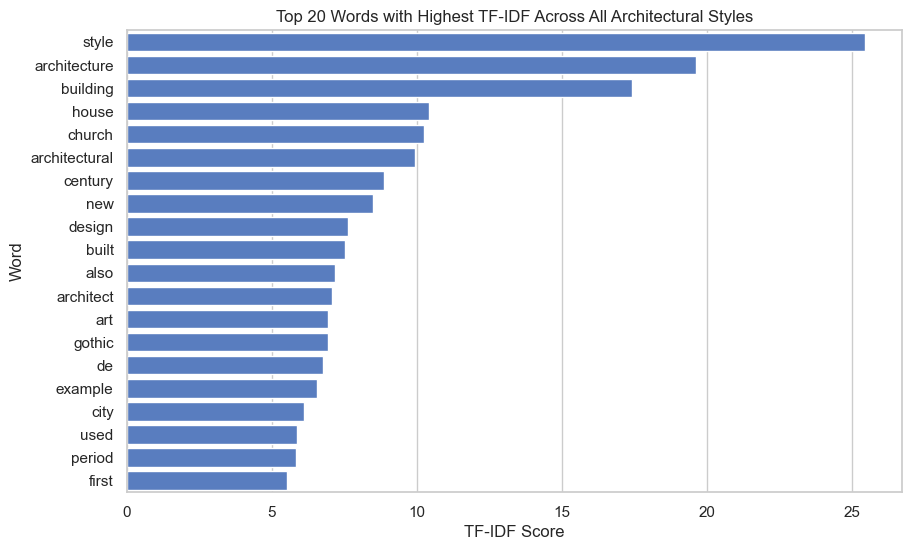

In [21]:
tfidfs= df.drop(columns = "Title")
tfidfs_sums = tfidfs.sum().sort_values(ascending=False)
top_words= tfidfs_sums.head(20).reset_index()

top_words.columns= ["word", "tfidf"]
sns.barplot(data=top_words, y="word", x="tfidf", orient="h")
plt.title("Top 20 Words with Highest TF-IDF Across All Architectural Styles")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()

In [22]:
df_melted = df.melt(id_vars="Title", var_name="word", value_name="tfidf")
top_terms = (
    df_melted.sort_values(["word", "tfidf"], ascending=[True, False])
              .groupby("Title")
              .head(5)
)

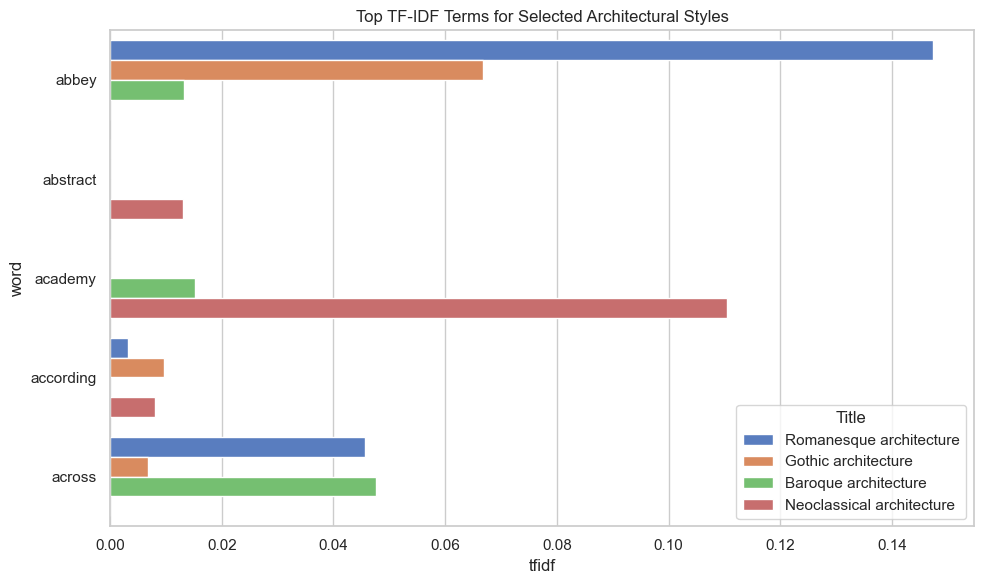

In [25]:
selected_styles = [
    "Gothic architecture",
    "Baroque architecture",
    "Modern architecture",
    "Romanesque architecture",
    "Neoclassical architecture",
]

subset = top_terms[top_terms["Title"].isin(selected_styles)]

plt.figure(figsize=(10, 6))
sns.barplot(data=subset, y="word", x="tfidf", hue="Title")
plt.title("Top TF-IDF Terms for Selected Architectural Styles")
plt.tight_layout()
plt.show()

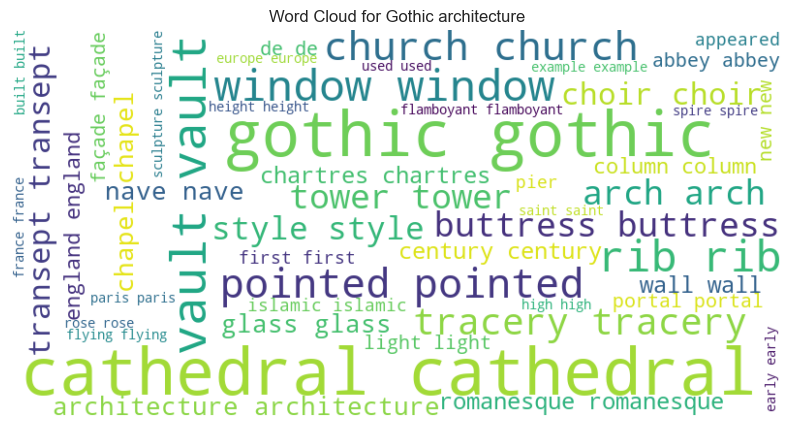

In [27]:
style = "Gothic architecture"  

subset = df_melted[df_melted["Title"] == style]
subset = subset.sort_values("tfidf", ascending=False).head(50)
text = " ".join(subset["word"].repeat((subset["tfidf"]*100).astype(int)))

wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for {style}")
plt.show()